# K-means Clustering in NumPy

In [1]:
import numpy as np
import sklearn as sk

import copy

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Algorithm

In [2]:
class Convergence:
    """an object, that stores the previous distance deltas, and """
    def __init__(self, data, lenght=3):
        self.delta_distances = np.zeros((3,1))
        self.index = 0
        self.epsilon = 10

    def is_converged(self, delta_distance):
        self.delta_distances[self.index] = delta_distance
        self.index = self.index+1 if self.index < 2 else 0
        return self.delta_distances.sum() < self.epsilon

In [3]:
def label_data(data):
    # assuming data consists of n individual features where n is shape[1]
    labeled_data = np.ones((data.shape[0], data.shape[1]+1))
    # providing a unique identification for convenience
    labeled_data[:,1:] = data
    
    return labeled_data

def generate_centroids(data, K):
    copied_data = sk.utils.shuffle(copy.copy(data))
    return copied_data[:K,:].reshape(K, copied_data.shape[1])

def recalculate_centroids(labeled_data, centroids, K):
    new_centroids = np.zeros((centroids.shape))
    for index in range(K):
        cluster = np.array([row[1:] for row in labeled_data if row[0] == index])
        new_centroids[index, :] = np.sum(cluster, axis=0)/len(cluster)
    
    delta_distance = calculate_euclidian(new_centroids,centroids)/K
    
    return new_centroids, delta_distance

def assign_data(labeled_data, centroids):
    for index in range(len(labeled_data)):
        labeled_data[index, 0] = np.argmin(np.array([calculate_euclidian(labeled_data[index, 1:], centroid) for centroid in centroids]))
        
def calculate_euclidian(vector_a, vector_b):
    """Euclidian distance between two vectors."""
    return np.sqrt(((vector_a-vector_b)**2).sum())

def find_clusters(data, K):
    c = Convergence(data)
    labeled_data = label_data(data)
    centroids = generate_centroids(data, K)
    delta_distance = np.inf
    
    while not c.is_converged(delta_distance):
        # assigning points to centroids
        try:
            assign_data(labeled_data, centroids)
            centroids, delta_distance = recalculate_centroids(labeled_data, centroids, K)
            
        except ValueError:
            c = Convergence(data)
            centroids = generate_centroids(data, K)
            delta_distance = np.inf
            
    return labeled_data

## Examples

Randomly generated data points in two dimensional euclidian space, with standard normal distribution.

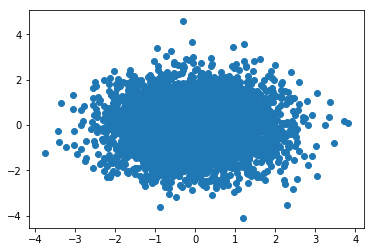

In [561]:
nb_samples = 5000
samples = np.ones((nb_samples, 2))

for i in range(0,nb_samples):
    samples[i, :] = [np.random.normal(0,1), np.random.normal(0,1)]
    
fig = plt.figure()
plt.scatter(samples[:,0],samples[:,1])

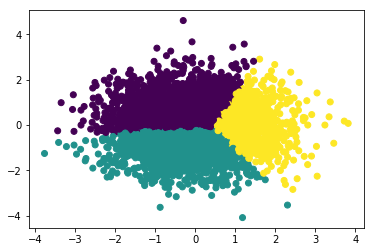

In [562]:
clustered = find_clusters(samples, K=3)
fig = plt.figure()
plt.scatter(clustered[:,1],
            clustered[:,2],
            c=clustered[:,0])

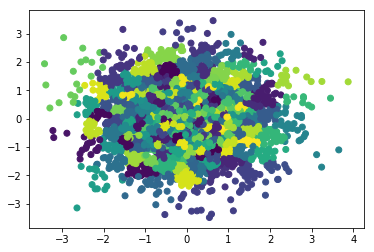

In [541]:
clustered = find_clusters(samples, K=256)
fig = plt.figure()
plt.scatter(clustered[:,1],
            clustered[:,2],
            c=clustered[:,0])

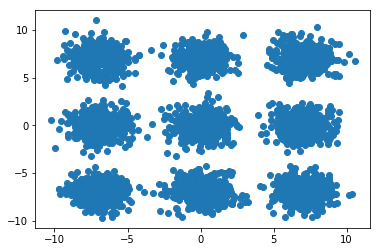

In [624]:
nb_samples = 3600
samples = np.ones((nb_samples, 2))

distance = 7

for i in range(0,nb_samples,9):
    noise = np.random.normal(0,1,18)
    samples[i, :] = [-distance+noise[0], -distance+noise[1]]
    samples[i+1, :] = [-distance+noise[2], distance+noise[3]]
    samples[i+2, :] = [-distance+noise[4], noise[5]]
    samples[i+3, :] = [distance+noise[6], -distance+noise[7]]
    samples[i+4, :] = [distance+noise[8], distance+noise[9]]
    samples[i+5, :] = [distance+noise[10], noise[11]]
    samples[i+6, :] = [noise[12], -distance+noise[13]]
    samples[i+7, :] = [noise[14], distance+noise[15]]
    samples[i+8, :] = [noise[16], noise[17]]

    
fig = plt.Figure()
plt.scatter(samples[:,0], 
            samples[:,1])

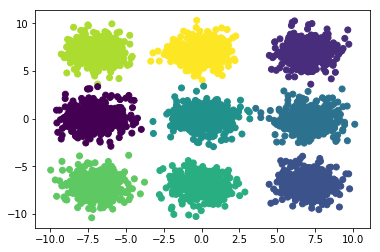

In [588]:
clustered = find_clusters(samples, K=9)
fig = plt.Figure()
plt.scatter(clustered[:,1],
            clustered[:,2],
            c=clustered[:,0])

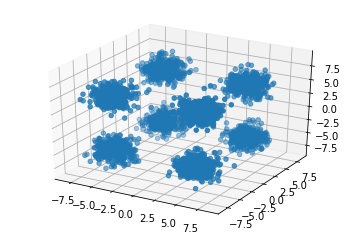

In [4]:
np.random.seed(1)
nb_samples = 3200
samples = np.ones((nb_samples, 3))

distance = 5

for i in range(0,nb_samples,8):
    noise = np.random.normal(0,1,23)
    samples[i, :] = [-distance + noise[0], -distance + noise[1], -distance + noise[2]]
    samples[i+1, :] = [-distance + noise[3], -distance + noise[4], distance + noise[5]]
    samples[i+2, :] = [-distance + noise[6], distance + noise[7], -distance + noise[8]]
    samples[i+3, :] = [distance + noise[9], -distance + noise[10], -distance + noise[11]]
    samples[i+4, :] = [-distance + noise[11], distance + noise[12], distance + noise[13]]
    samples[i+5, :] = [distance + noise[14], -distance + noise[15], distance + noise[16]]
    samples[i+6, :] = [distance + noise[17], distance + noise[18], -distance + noise[19]]
    samples[i+7, :] = [distance + noise[20], distance + noise[21], distance + noise[22]]
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[:,0], 
           samples[:,1],
           samples[:,2])

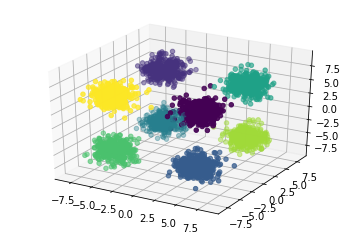

In [642]:
clustered = find_clusters(samples, K=8)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered[:,1],
           clustered[:,2],
           clustered[:,3],
           c=clustered[:,0])

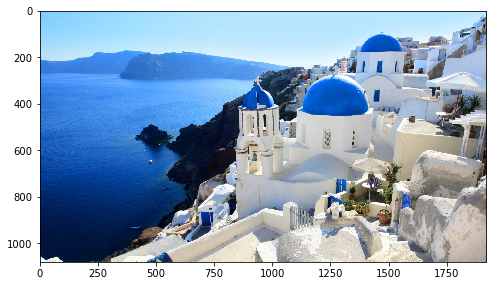

In [5]:
greece = mpimg.imread('greece.jpg')
fig = plt.figure(figsize=(8,8))
plt.imshow(greece)

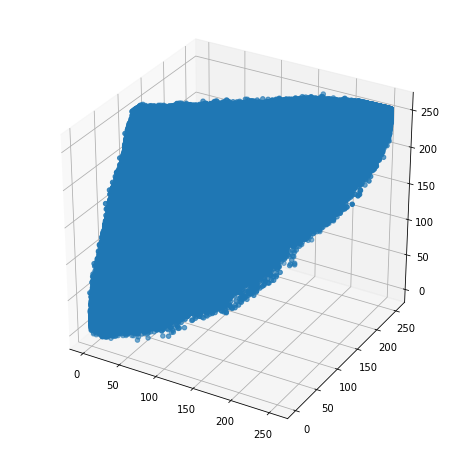

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(greece[:,:,0],
           greece[:,:,1],
           greece[:,:,2])

In [6]:
samples = np.ones((greece.shape[0]*greece.shape[1], 3))
samples[:,0] = greece[:,:,0].reshape(greece.shape[0]*greece.shape[1])
samples[:,1] = greece[:,:,1].reshape(greece.shape[0]*greece.shape[1])
samples[:,2] = greece[:,:,2].reshape(greece.shape[0]*greece.shape[1])

In [7]:
clustered = find_clusters(samples, K=16)

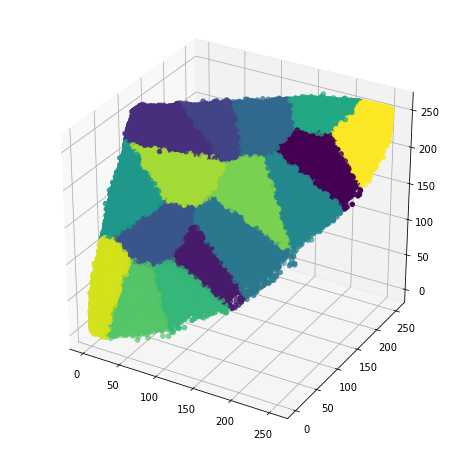

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered[:,1],
           clustered[:,2],
           clustered[:,3],
           c=clustered[:,0])